# Итоговое задание №2. Прогнозирование конечных свойств новых материалов (композиционных материалов)
На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов. 

Предсказание (из семинара 22): 
* модуль упругости при растяжении
* прочности при растяжении
* cоотношение матрица-наполнитель

Предсказание (из итогового вебинара 26.11.2022):
* модуль упругости при растяжении
* прочности при растяжении

# Предобработка и анализ данных

Загрузка основных библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Загрузка данных из файлов Excel

In [2]:
df_bp = pd.read_csv('../data/raw/X_bp.csv', sep=';',index_col=0) # Загрузка и создание датафрейма из csv файла
df_nup = pd.read_csv('../data/raw/X_nup.csv', sep=';',index_col=0) # Загрузка и создание датафрейма из csv файла

In [3]:
#pd.DataFrame(df_nup.columns, columns=['характиристики нашивок'])
#pd.DataFrame(df_bp.columns, columns=['характиристики базальтопластика'])
df_bp.shape


(1023, 10)

In [4]:
df_nup.shape

(1040, 3)

Объединение по Inner Join

In [5]:
df = df_bp.merge(df_nup, left_index=True, right_index=True)
df.head()
##pd.DataFrame(df.columns, columns=['характиристики композиционных материалов в объединенном датасете'])

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,"1,857142857",2030,"738,7368421",30,"22,26785714",100,210,70,3000,220,0,4,57
1,"1,857142857",2030,"738,7368421",50,"23,75","284,6153846",210,70,3000,220,0,4,60
2,"1,857142857",2030,"738,7368421","49,9",33,"284,6153846",210,70,3000,220,0,4,70
3,"1,857142857",2030,"738,7368421",129,"21,25",300,210,70,3000,220,0,5,47
4,"2,771331058",2030,753,"111,86","22,26785714","284,6153846",210,70,3000,220,0,5,57


In [29]:
#join_dataFrame = df_bp.join(df_nup, how='inner')
#join_dataFrame.shape
#pd.DataFrame(join_dataFrame.columns, columns=['характиристики композиционных материалов в join_dataFrame'])

## Анализ датасета

Посмотрим размерность объединенного датасета

In [6]:
df.shape

(1023, 13)

Проверим на пустые элементы

In [7]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Проверяем типы данных

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Соотношение матрица-наполнитель       1023 non-null   object
 1   Плотность, кг/м3                      1023 non-null   object
 2   модуль упругости, ГПа                 1023 non-null   object
 3   Количество отвердителя, м.%           1023 non-null   object
 4   Содержание эпоксидных групп,%_2       1023 non-null   object
 5   Температура вспышки, С_2              1023 non-null   object
 6   Поверхностная плотность, г/м2         1023 non-null   object
 7   Модуль упругости при растяжении, ГПа  1023 non-null   object
 8   Прочность при растяжении, МПа         1023 non-null   object
 9   Потребление смолы, г/м2               1023 non-null   object
 10  Угол нашивки, град                    1023 non-null   int64 
 11  Шаг нашивки                   

Заменяем тип данных object на числовой

In [9]:
for col in df.columns:
    if col != "Угол нашивки, град":
        df[col] = df[col].astype('str')
        df[col] = df[col].str.replace(',', '.')
        df[col] = df[col].astype('float')

Проверяем измененные типы в датасете

In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Проверим характер распределения

<AxesSubplot: ylabel='Density'>

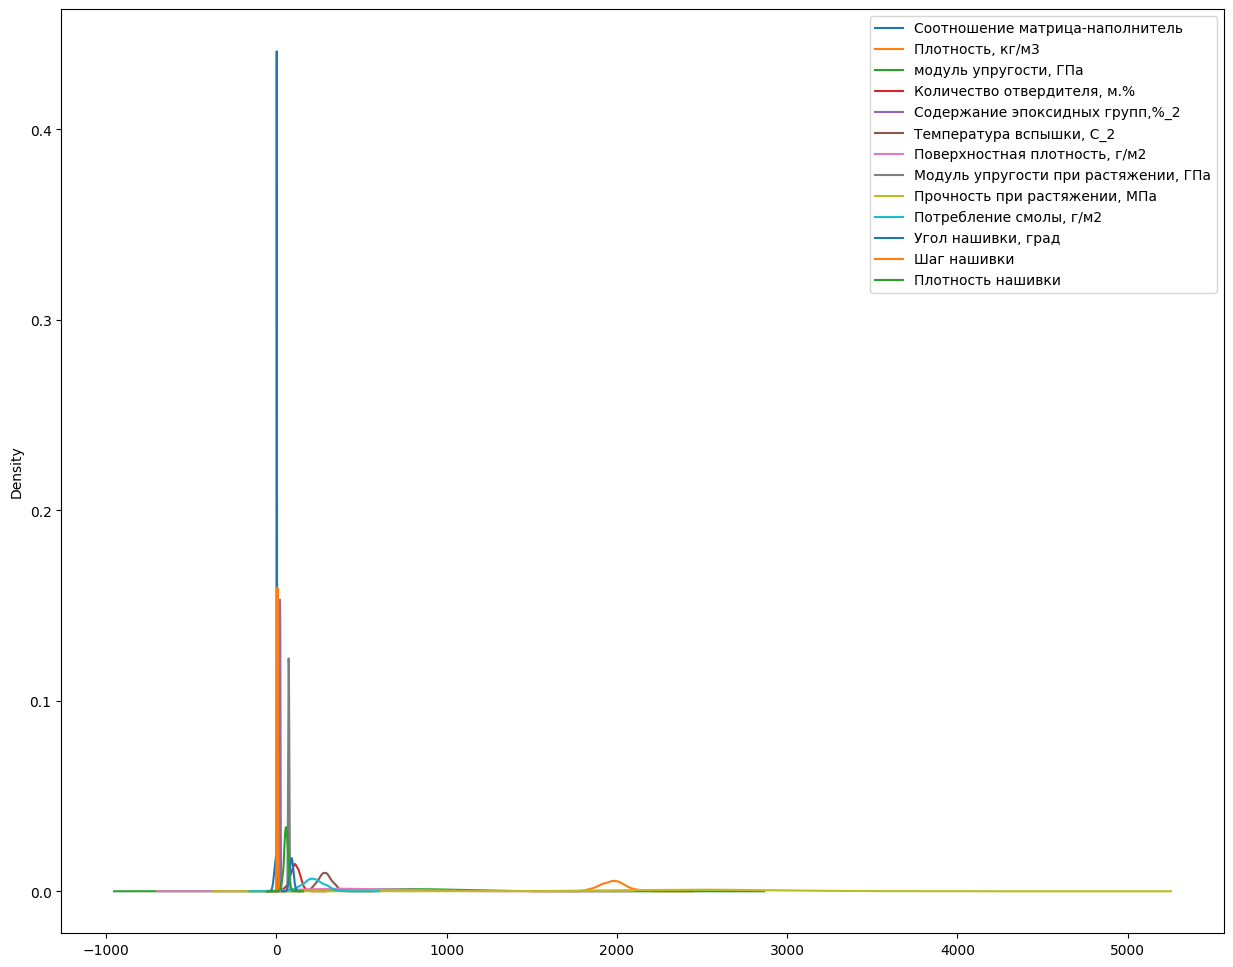

In [11]:
fig, ax = plt.subplots(figsize=(15, 12))
df.plot(kind='kde', ax=ax)

Большой разброс значений, поэтому проведем нормализацию и еще раз проверим характер распределения

<AxesSubplot: ylabel='Density'>

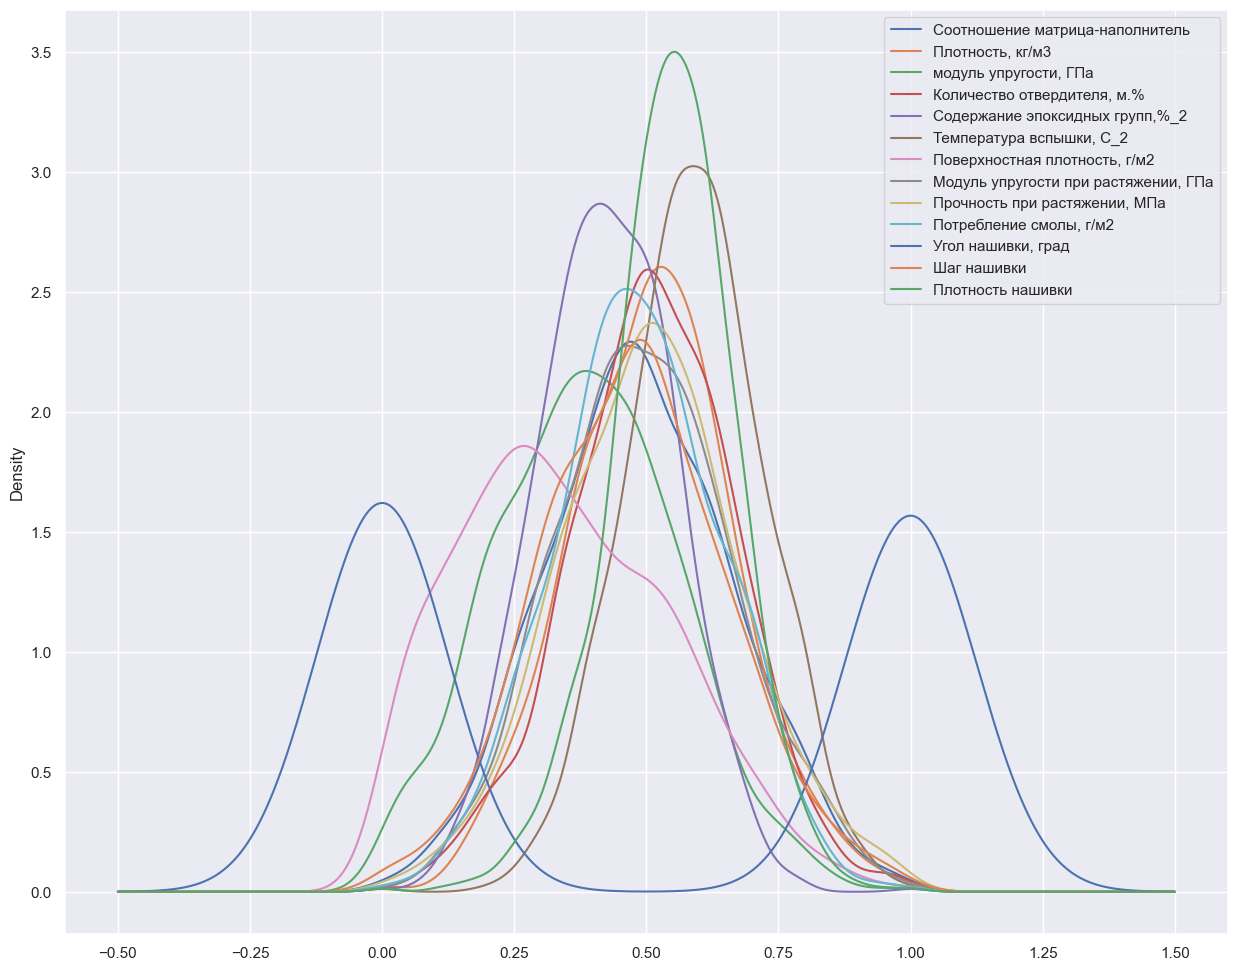

In [16]:
#нормализация даиасета без выбросов, с перекодированны столбцом угла нашивки
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df_norm = pd.DataFrame(d, columns=names, index = df.index)

#sns.set(rc={'figure.figsize':(13,10)})
#ax = sns.boxplot(data=df_norm)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig, ax = plt.subplots(figsize=(15, 12))
df_norm.plot(kind='kde', ax=ax)

In [39]:
df_norm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.548135
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.576985
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.673149
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.548135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361750,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.485125,0.480312,0.239516,1.0,0.628535,0.452161
1019,0.587163,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.475992,0.470745,0.220404,1.0,0.731664,0.516890
1020,0.555750,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.573346,0.578340,0.532590,1.0,0.288158,0.650355
1021,0.637396,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.536217,0.368070,0.428909,1.0,0.437186,0.560262


Два разных распределения, в зависимости от угла нашивки.
И по плотности заметно два разных распределения.

Разделим датасет на 2 датасета

In [55]:
df0_norm_tmp = (df_norm.assign(domain=df['Угол нашивки, град']).query("domain in [0]")).drop(['domain'], axis=1)
df0_norm = df0_norm_tmp.drop(['Угол нашивки, град'], axis=1)
df90_norm_tmp = (df_norm.assign(domain=df['Угол нашивки, град']).query("domain not in [0]")).drop(['domain'], axis=1)
df90_norm = df90_norm_tmp.drop(['Угол нашивки, град'], axis=1)
#df90.describe().T
#df90.describe().T

Посмотрим распределение для новых датасетов

<AxesSubplot: ylabel='Density'>

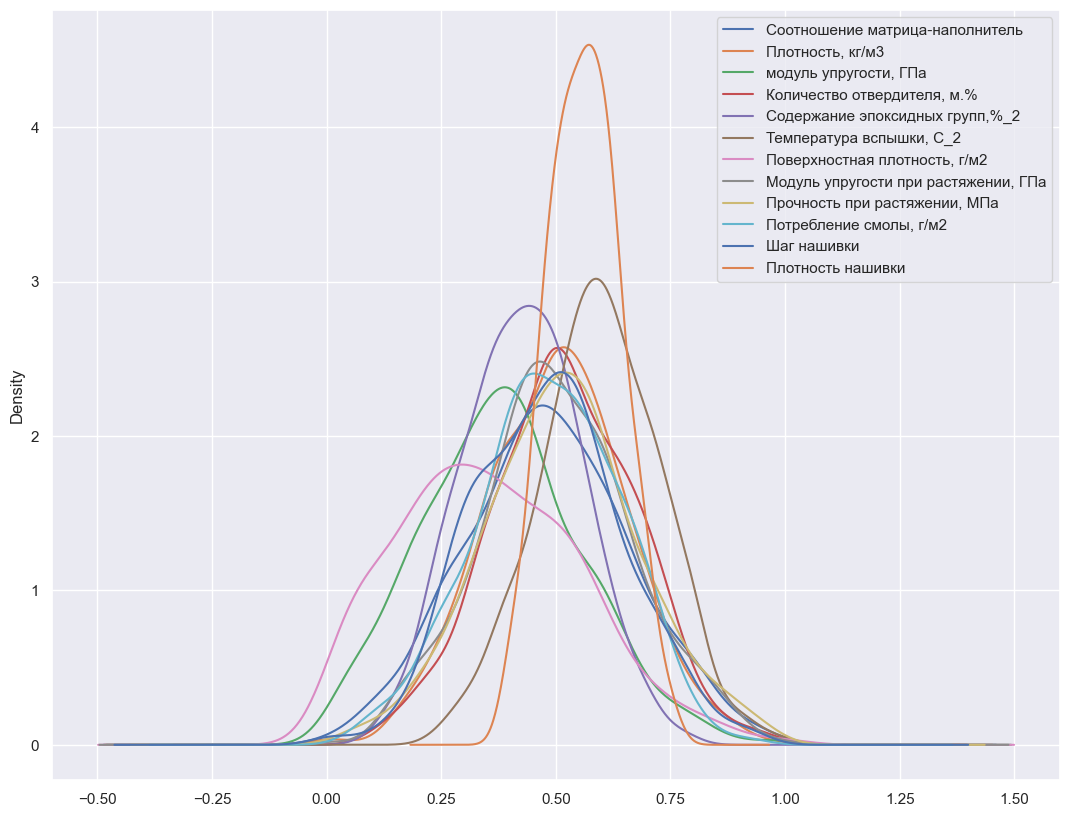

In [56]:
df90_norm.plot(kind='kde')

<AxesSubplot: ylabel='Density'>

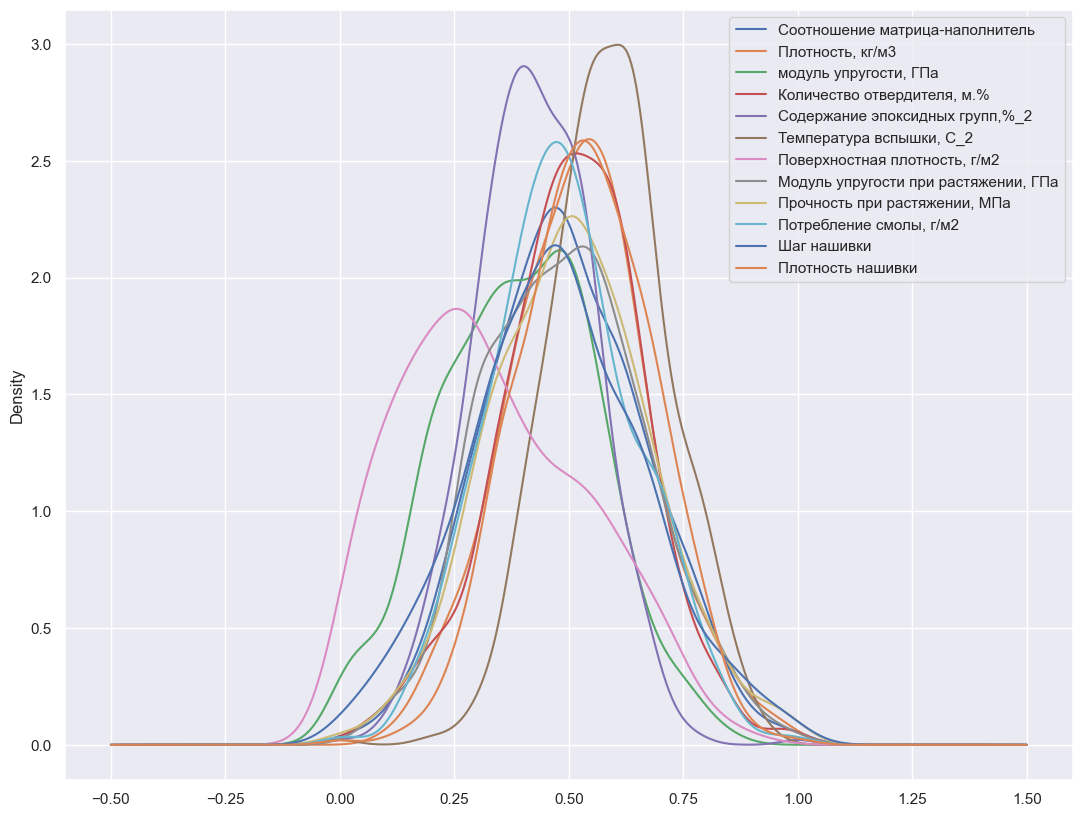

In [57]:
df0_norm.plot(kind='kde')

Можно было бы столбец с углом нашивки разнести на 2 бинарных столбца ("угол 0 градусов" и "угол 90 градусов"), но в целом угол нашивки может быть непрерывной величиной, от которой зависят результирующие свойства композитного материала. А может и не быть - если технология изготовления композитов такова, что применяются только углы 0 и 90 градусов.

Попробуем проанализировать данные с перекодировкой и без, и сравним результат. Предварительно приоритетным считаю вариант без перекодировки для получения наиболее общей модели.

In [58]:
df0_norm.to_csv('../data/interim/df0_norm.csv', sep=';') #записываем промежуточные данные в csv
df90_norm.to_csv('../data/interim/df90_norm.csv', sep=';') #записываем промежуточные данные в csv

Матрицу корреляции, визуализацию попарных зависимостей уже проверяли в 1.0, нормализация и разделение выборки не изменит характер данных. 